In [42]:
import pickle

all_dict = pickle.load(open('results/all_dict.pkl', 'rb'))
all_dict.keys() 

dict_keys(['cropped_filenames', 'cropped_imgs', 'cropped_segments', 'aspect_ratios', 'widths', 'heights', 'noses'])

In [43]:
noses = all_dict['noses']
widths = all_dict['widths']
heights = all_dict['heights']
imgs = all_dict['cropped_imgs']
segments = all_dict['cropped_segments']

In [44]:
idx = 2
img = all_dict['cropped_imgs'][idx]
segment = all_dict['cropped_segments'][idx]
nose = all_dict['noses'][idx]

In [45]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

def polygon_overlay_image(image, segments): 
  overlay = image.copy()
  alpha = 0.5 

  for label, polygons in segments.items(): 
    for polygon in polygons:
      int_coords = lambda x: np.array(x).round().astype(np.int32)
      exterior = [int_coords(polygon.exterior.coords)]
      cv2.fillPoly(overlay, exterior, color=(255, 255, 0))
      cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)
  return overlay

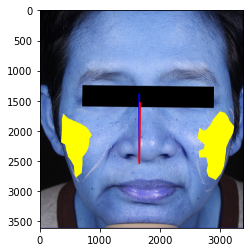

In [62]:
overlay = polygon_overlay_image(img, segment)
plt.imshow(overlay)

In [63]:
noses 

[[1774.359489440918, 2531.9010486602783],
 [1697.4993438720703, 2569.628066778183],
 [1704.4708523154259, 2487.194137573242],
 [1626.7563858032227, 2785.4947214126587],
 [1694.8682899475098, 2519.289118051529],
 [1643.2596716880798, 2536.2859402298927]]

In [64]:
import math 
standard_nose_y = max([nose[1] for nose in noses])
max_padded_height = -1 
for height, nose in zip(heights, noses): 
    current_height = height + (standard_nose_y - nose[1])
    if current_height > max_padded_height:
        max_padded_height = current_height

max_padded_height = math.ceil(max_padded_height)
max_padded_height

3967

In [65]:
import math 
# # maximum distance between nose and the bottom frame of image 
# max_nose_height = max([(height - nose[1]) for height, nose in zip(heights, noses)])

# # min pad to get nose at the center y 
# padded_heights = [] 
# for height, nose in zip(heights, noses): 
#     nose_height_to_max_nose_height = (height - nose[1]) - (max_nose_height) 
#     padded_heights.append(height + nose_height_to_max_nose_height)

# min pad to get nose at the center x 
padded_widths = [] 
for width, nose in zip(widths, noses): 
    padded_widths.append(width + abs(width // 2 - nose[0]))

max_padded_width = math.ceil(max(padded_widths))
# max_padded_height = math.ceil(max(padded_heights))
print(max_padded_width, max_padded_height)

3558 3967


In [66]:
import shapely 
from collections import defaultdict
standard_nose = (max_padded_width//2, standard_nose_y) # depending on the dataset 
translated_segments = defaultdict(list)

viz_segments = [] 
xoffs = []
yoffs = [] 
for nose, segment, height, width in zip(list(noses), segments, heights, widths):  
    xoff = standard_nose[0] - nose[0]
    yoff = standard_nose[1] - nose[1]
    print(f'nose = {nose}')
    print(f'standard_nose = {standard_nose}')
    print(f'xoff = {xoff}')
    print(f'yoff = {yoff}')

    xoffs.append(xoff)
    yoffs.append(yoff)

    viz_polygons = defaultdict(list)
    for label, polygons in segment.items(): 
        for polygon in polygons:
            translated_polygon = shapely.affinity.translate(polygon, xoff=xoff, yoff=yoff)
            translated_segments[label].append(translated_polygon)
            viz_polygons[label].append(translated_polygon)
    viz_segments.append(viz_polygons)

nose = [1774.359489440918, 2531.9010486602783]
standard_nose = (1779, 2785.4947214126587)
xoff = 4.640510559082031
yoff = 253.59367275238037
nose = [1697.4993438720703, 2569.628066778183]
standard_nose = (1779, 2785.4947214126587)
xoff = 81.50065612792969
yoff = 215.8666546344757
nose = [1704.4708523154259, 2487.194137573242]
standard_nose = (1779, 2785.4947214126587)
xoff = 74.52914768457413
yoff = 298.3005838394165
nose = [1626.7563858032227, 2785.4947214126587]
standard_nose = (1779, 2785.4947214126587)
xoff = 152.24361419677734
yoff = 0.0
nose = [1694.8682899475098, 2519.289118051529]
standard_nose = (1779, 2785.4947214126587)
xoff = 84.13171005249023
yoff = 266.20560336112976
nose = [1643.2596716880798, 2536.2859402298927]
standard_nose = (1779, 2785.4947214126587)
xoff = 135.74032831192017
yoff = 249.20878118276596


In [67]:
print(h,w,img.shape, bg.shape)

3610 3376 (3610, 3376, 3) (3967, 3558, 3)


In [68]:
for img in imgs:
    print(img.shape)

(3639, 3456, 3)
(3682, 3456, 3)
(3457, 3441, 3)
(3925, 3456, 3)
(3700, 3456, 3)
(3610, 3376, 3)


In [69]:
xoff 

135.74032831192017

In [70]:
yoff 

249.20878118276596

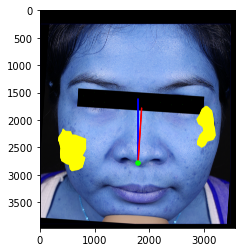

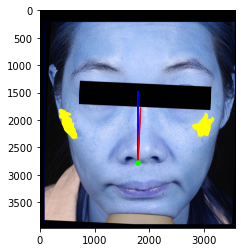

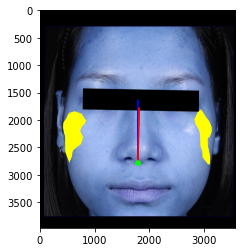

idx = 3


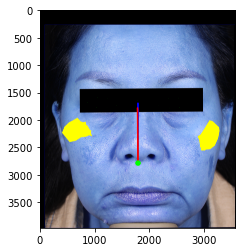

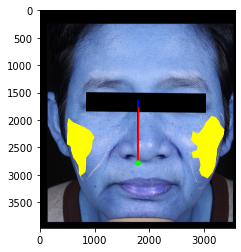

idx = 6
idx = 7
idx = 8
idx = 9


In [99]:
for idx in range(10):
    try: 
        img = all_dict['cropped_imgs'][idx]
        segment = all_dict['cropped_segments'][idx]
        nose = all_dict['noses'][idx]
        viz_segment = viz_segments[idx]

        bg = np.zeros((max_padded_height, max_padded_width, 3), dtype=np.uint8)
        h, w = img.shape[:2]

        xoff = round(xoffs[idx])
        yoff = round(yoffs[idx])

        bg[yoff:yoff+h, xoff:xoff+w, :] = img 

        import cv2 
        rounded_standard_nose = [round(e) for e in standard_nose]
        cv2.circle(bg, rounded_standard_nose, 50, (0,255,0), -1)
        overlay = polygon_overlay_image(bg, viz_segment)
        plt.imshow(overlay)
        plt.show()
    except:
        print(f'idx = {idx}')

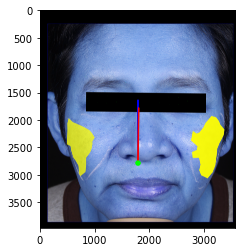

In [101]:
import cv2 
rounded_standard_nose = [round(e) for e in standard_nose]
cv2.circle(bg, rounded_standard_nose, 50, (0,255,0), -1)
plt.imshow(bg)

In [102]:
from shapely.geometry import Polygon
def create_face_heatmaps(max_width, max_height, segments, patch_size=(100,100)):
    num_y = math.ceil(max_height / patch_size[0])
    num_x = math.ceil(max_width / patch_size[1])

    face_heatmaps = dict() 
    err_polygons = list()
    err_current_rects = list()
    for label in segments.keys():
      face_heatmap = np.zeros((num_y, num_x))
      for i in range(num_y):  
          for j in range(num_x): 
              current_rect = Polygon([
                  [j*patch_size[1], i*patch_size[0]], 
                  [j*patch_size[1] + patch_size[1], i*patch_size[0]],
                  [j*patch_size[1] + patch_size[1], i*patch_size[0] + patch_size[0]],
                  [j*patch_size[1], i*patch_size[0] + patch_size[0]] 
              ]) 
              for polygon in segments[label]: 
                try: 
                  area = current_rect.intersection(polygon).area * 1. / current_rect.area
                except:
                  area = current_rect.intersection(polygon.buffer(0)).area * 1. / current_rect.area
                if area > 0:
                  face_heatmap[i][j] += 1
      face_heatmaps[label] = face_heatmap
    return face_heatmaps

In [103]:
face_heatmaps = create_face_heatmaps(max_padded_width, max_padded_height, translated_segments, patch_size=(100,100))

Input geom 1 is INVALID: Self-intersection at or near point 916.06441446502185 2187.901495653603 (916.06441446502185499 2187.9014956536029786)
<A>
06441446502185 2187.901495653603
POLYGON ((677.3371952379097820 1961.2728182306527742, 593.5875547829141397 2010.5723331177528053, 526.6437406180884864 2043.3455127105357860, 442.6146091672405873 2125.9771891821228564, 400.0410614501126929 2233.9573505868902430, 540.4313758662467535 2403.8071227553186873, 654.9526364380751602 2376.1949533829656502, 748.3455334868610862 2312.6900809584717535, 826.9740910065485195 2306.2062751091616519, 898.6397152554653758 2278.2347601707128888, 948.4582848491476170 2300.0818148259468217, 927.4497031814701131 2249.9038996661688543, 920.5466608383816265 2221.2735845232114116, 935.0714366567492561 2192.8229421633022866, 906.5609033691573586 2185.4407723987533245, 920.7862245491120348 2192.7031603079367414, 899.5380791707042363 2171.0956693634334442, 864.3640672507542604 2106.5127602406528240, 835.97331581852722

In [104]:
print(f'widths = {widths}')
print(f'heights = {heights}')
print(f'max_padded_width = {max_padded_width}')
print(f'max_padded_height = {max_padded_height}')

widths = [3456 3456 3441 3456 3456 3376]
heights = [3639, 3682, 3457, 3925, 3700, 3610]
max_padded_width = 3558
max_padded_height = 3967


In [105]:
import plotly.express as px
import plotly.graph_objects as go 
fig = go.Figure()

buttons = [] 
visible_list = [False] * (len(face_heatmaps.keys()) + 1)


for idx, (label, heatmap_data) in enumerate(face_heatmaps.items()):
    fig.add_trace(go.Heatmap(z=face_heatmaps[label][::-1]))

current_visible_list = visible_list.copy()
current_visible_list[0] = True
current_visible_list[idx+1] = True
button = dict(
    method='update',
    label=label, 
    args=[{'visible': current_visible_list}]
)
buttons.append(button)

fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction = "left",
            buttons=buttons[::-1],
            pad={"l":70, "t": -10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
        
    ], 
    width=500,
    height=600
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Segment type:", showarrow=False,
                            x=5, y=1.10, yref="paper", align="left")
    ]
)

fig.show()